<a href="https://colab.research.google.com/github/pah-10/Programacao_linear_algoritmos/blob/main/pah-10/Programacao_linear_algoritmos/Lista%201/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1

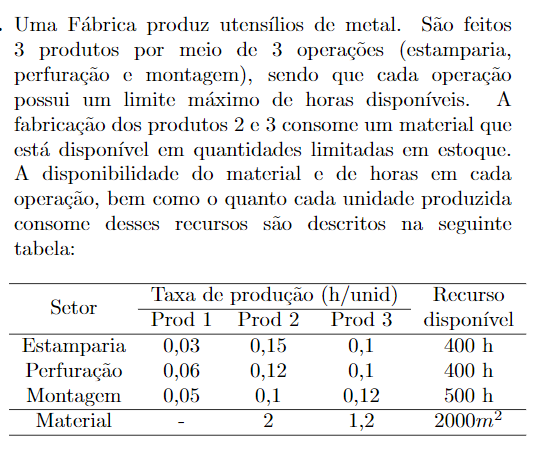

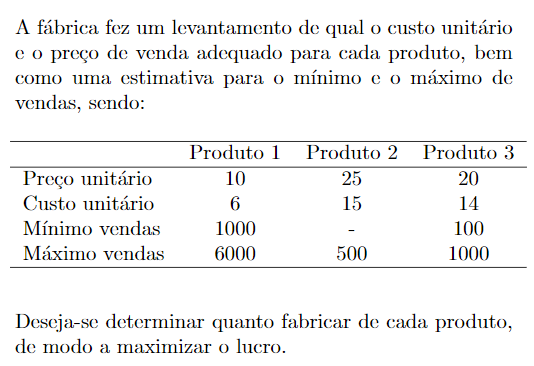

In [ ]:
# Instalando a biblioteca PyMathProg
!pip install pymprog

In [ ]:
from IPython.core.display import Math
# criação do modelo
from pymprog import*

#dados de entrada

#Preço vendo   
Preco = [10, 25, 20]

#Custo unitario
Custo = [6, 15, 14]

#limite minimo de produção dos produtos
Min = [1000, 0, 100]

# limite maximo de pordução dos produtos
Max = [6000, 500, 1000]

#percentuais e materias-primas de cada liga
Qtd = [
       [0.03, 0.015, 0.1],
       [0.06, 0.12, 0.1],
       [0.05, 0.1, 0.12],
       [0, 2, 1.2],
]

#totais maximos de recursos
Total = [400, 400, 500, 2000]

# qtd de produtos
n = len(Preco) 

# qtd de materiais
m = len(Total) 

#iniciando o modelo na biblioteca
begin("lucro")

#definindo variaveis de decisão
#cria n variaveis continuas, inciando em x0 até xn-1
X = var("X", n, int)


#definindo a função objetivo
#a função range cria um interaveis que começa em 0 e vai até o numero colacado -1
#a função maximize tras o maior valor
maximize(sum((Preco[i] - Custo[i]) * X[i]  for i in range(n)))

#definindo restrinções de quantidades de recursos
for j in range(m):
  sum(Qtd[j][i] * X[i] for i in range(n)) <= Total[j]

#definindo restrinções dos valores encontrados entre os limites de produção de produtos
for i in range(n):
  Min[i] <= X[i] <= Max[i]

#resolve o modelo
solve()

#printando o valor ótimo da função objetiva, ou seja, o lucro maximo
print("Valor ótimo = {}" . format(vobj()) + "\n")

print("\nSolução ótima")

#printando a solução otima do problema, ou seja, os valores das variaveis com = 1 para ficar igual o exemplo da sala
for i in range(n):
  print("X[{}] = {:.3f}" . format(i+1, X[i].primal))

print("\nQuantidade de horas utilizadas em cada recurso no total")

#printando a solução otima do problema, ou seja, os valores das variaveis com = 1 para ficar igual o exemplo da sala
for j in range(n):
  print(sum(Qtd[j][i] * X[i].primal for i in range(n)))


end()

Valor ótimo = 27600.0


Solução ótima
X[1] = 5500.000
X[2] = 500.000
X[3] = 100.000

Quantidade de horas utilizadas em cada recurso no total
182.5
400.0
337.0


model('lucro') is not the default model.

# Exercício 2 - TAREFA

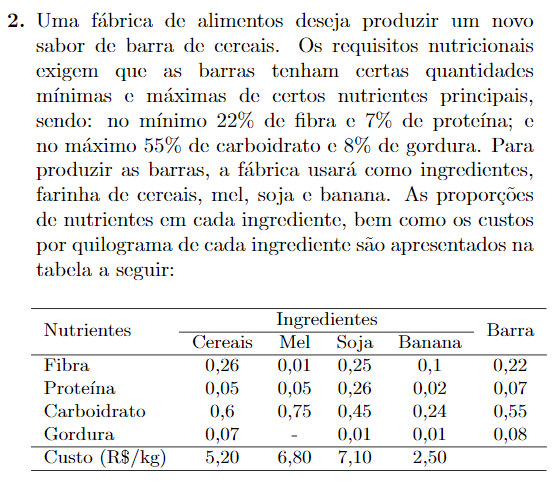

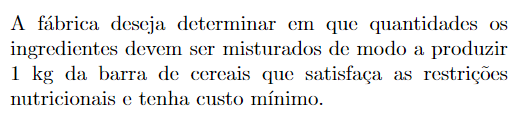

In [ ]:
# Instalando a biblioteca PyMathProg
!pip install pymprog

     |████████████████████████████████| 44 kB 1.2 MB/s 
     |████████████████████████████████| 2.3 MB 7.0 MB/s 
  Created wheel for pymprog: filename=pymprog-1.1.2-py3-none-any.whl size=43501 sha256=9357aa385a6f6ee2f03eda3f571e0533e7b775d4d85fcadb594ac70f5055437c
  Stored in directory: /root/.cache/pip/wheels/a7/76/08/6f55f5367d8268927106437637699f9a427e4cc6af9f3e01ec
Successfully built pymprog


In [ ]:
from IPython.core.display import Math
from pymprog import*

#custo de produção de cada ingrediente
C = [5.20, 6.80, 7.10, 2.50]

#Minimos de nutrientes
Lmin = [0.22, 0.07]

#Maximos de nutrientes
Lmax = [0.55, 0.08]

#Utilização de nutrientes e ingredientes
U = [
     [0.26, 0.01, 0.25, 0.1],
     [0.05, 0.05, 0.26, 0.02]
]

#Utilização de nutrientes e ingredientes maximos 
U2 = [
     [0.6, 0.75, 0.45, 0.24],
     [0.07, 0, 0.01, 0.01]
]

#Peso em kg da barra
Kg = 1

# qtd de ingredientes
n = len(C) 

# qtd de nutrientes minimos
m = len(Lmin) 

# qtd de nutrientes maximos
m2 = len(Lmax) 

begin("barras")

#variaveis de decisão
X = var("X", n, int)

#definindo a função objetivo
print(minimize(sum(C[i] * X[i]  for i in range(n))))
print("\n")

#definindo restrinções de limites minimos
for j in range(m):
  print(sum(U[j][i] * X[i] for i in range(n)) >= Lmin[j])
print("\n")

#definindo restrinções de limites maximos
for j in range(m2):
  print(sum(U2[j][i] * X[i] for i in range(n)) <= Lmax[j])
print("\n")

#definindo restrinções de total de kg da barra
print(sum(X[i] for i in range(n)) == Kg)
print("\n")

solve()

#printando o valor ótimo da função objetiva, ou seja, o menor custo
print("Valor ótimo = {}" . format(vobj()))

#printando a solução otima do problema, ou seja, os valores das variaveis
print("\nSolução ótima")
for i in range(n):
  print("\tX[{}] = {:.3f}" . format(i+1, X[i].primal))
 
print("\n")
end()


Min : 5.2 * X[0] + 6.8 * X[1] + 7.1 * X[2] + 2.5 * X[3]


R1: 0.26 * X[0] + 0.01 * X[1] + 0.25 * X[2] + 0.1 * X[3] >= 0.22
R2: 0.05 * X[0] + 0.05 * X[1] + 0.26 * X[2] + 0.02 * X[3] >= 0.07


R3: 0.6 * X[0] + 0.75 * X[1] + 0.45 * X[2] + 0.24 * X[3] <= 0.55
R4: 0.07 * X[0] + 0 * X[1] + 0.01 * X[2] + 0.01 * X[3] <= 0.08


R5: (X[0] + X[1] + X[2] + X[3]==1)


Valor ótimo = 7.1

Solução ótima
	X[1] = 0.000
	X[2] = 0.000
	X[3] = 1.000
	X[4] = 0.000




model('barras') is not the default model.

# Exercício 3

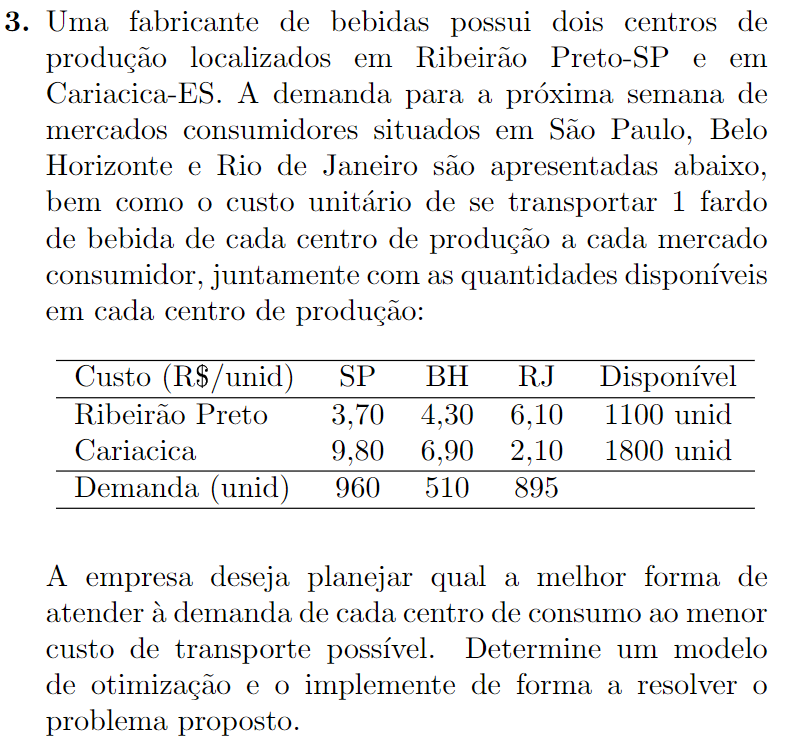

In [ ]:
# Instalando a biblioteca PyMathProg
!pip install pymprog

In [ ]:
from pymprog import*

# demanda
D = [960, 510, 895] 

# estoque
E = [1100, 1800] 

# custos de envio
C = [
     [3.7, 4.3, 6.1],
     [9.8, 6.9, 2.1]
    ] 

# número de fábricas
n = len(E) 

# número de clientes
m = len(D) 

begin("transporte")

#variaveis de decisao
#faz a criação do produto cartesiano e seus indices
A = iprod(range(n), range(m)) 

# cria uma variável para cada elemento de A
X = var("x", A, int)  

print("Printando elementos do produto cartesiano que serão os indices utilizados\n")

for elem in A:
  print(elem)

print("\n")

#Função ojetivo
minimize(sum(C[i][j] * X[i, j] for i, j in A))
  
#restrinções
for j in range(m):
  sum(X[i, j] for i in range(n)) == D[j]

for i in range(n):
  sum(X[i, j] for j in range(m)) <= E[i]

#resolvendo
solve()

#printando o valor ótimo da função objetiva, ou seja, o lucro maximo
print("Valor ótimo = {}" . format(vobj()) + "\n")

print("\nSolução ótima\n")

#printando a solução otima do problema, ou seja, os valores das variaveis com = 1 para ficar igual o exemplo da sala
for i,j in A:
  print("x[{},{}] = {}".format(i + 1, j + 1, X[i,j].primal))

print("\n")

end()


Printando elementos do produto cartesiano que serão os indices utilizados

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


Valor ótimo = 8586.5


Solução ótima

x[1,1] = 960.0
x[1,2] = 140.0
x[1,3] = 0.0
x[2,1] = 0.0
x[2,2] = 370.0
x[2,3] = 895.0




model('transporte') is not the default model.

# Exercício 4

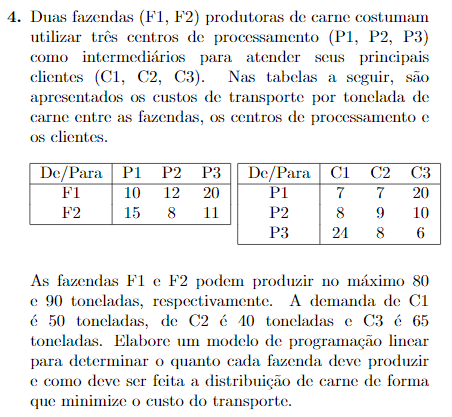

In [ ]:
# Instalando a biblioteca PyMathProg
!pip install pymprog
from pymprog import*

# demanda dos clientes
D = [50, 40, 65] 

# estoque das fazendas
E = [80, 90] 

# custos de envio Fazenda X Centro Processamento
CFP = [
       [10, 12, 20],
       [15, 8, 11]
    ] 

# custos de envio Centro Processamento X Cliente
CPC = [
       [7, 7, 20],
       [8, 9, 10],
       [24, 8, 6]
]

# número de fazendas
n = len(E) 

# número de  número de centros de processamentos
m = len(CPC)

# número de clientes 
o = len(D) 


begin("transporteComInterferencia")

#variaveis de decisao
#faz a criação do produto cartesiano e seus indices
A = iprod(range(n), range(m)) 
B = iprod(range(m), range(o))

# cria uma variável para cada elemento de A
X = var("x", A) 

# cria uma variável para cada elemento de B
Y = var("Y", B) 

print("\nPrintando elementos do produto cartesiano que serão os indices utilizados em X\n")

for elem in A:
  print(elem)

print("\n")

print("Printando elementos do produto cartesiano que serão os indices utilizados em Y\n")

for elem in B:
  print(elem)

print("\n")

#Função objetivo
minimize(sum(CFP[i][j] * X[i, j] for i, j in A) + sum(CPC[j][k] * Y[j, k] for j, k in B))
  
#restrinções 
#garante que cada cliente receba sua demanda ao receber do centro de processamento
for k in range(o):
  sum(Y[j, k] for j in range(m)) == D[k]

#garante que a quantidade enviada pela fazenda ao centro de processamento não ultrapasse o estoque dela 
for i in range(n):
  sum(X[i, j] for j in range(m)) <= E[i]

#garante que a quantidade que chega no centro de processamento vinda das fazendas é igual a quantidade que sai do centro de processamento para os clientes
for j in range(m):
  sum(X[i, j] for i in range(n)) == sum(Y[j, k] for k in range(o))

#resolvendo
solve()

#printando o valor ótimo da função objetiva, ou seja, o custo minimo geral
print("Valor ótimo = {}" . format(vobj()) + "\n")

print("\nSolução ótima\n")
#valores das variaveis com + 1
for i,j in A:
  print("x[{},{}] = {}".format(i + 1, j + 1, X[i,j].primal))

print("\n-------------\n")
#valores das variaveis com + 1
for j,k in B:
  print("Y[{},{}] = {}".format(j + 1, k + 1, Y[j,k].primal))


print("\n")

end()


Printando elementos do produto cartesiano que serão os indices utilizados em X

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


Printando elementos do produto cartesiano que serão os indices utilizados em Y

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


Valor ótimo = 2610.0


Solução ótima

x[1,1] = 65.0
x[1,2] = 0.0
x[1,3] = 0.0
x[2,1] = 0.0
x[2,2] = 25.0
x[2,3] = 65.0

-------------

Y[1,1] = 25.0
Y[1,2] = 40.0
Y[1,3] = 0.0
Y[2,1] = 25.0
Y[2,2] = 0.0
Y[2,3] = 0.0
Y[3,1] = 0.0
Y[3,2] = 0.0
Y[3,3] = 65.0




model('transporteComInterferencia') is not the default model.

# Exercício 6 

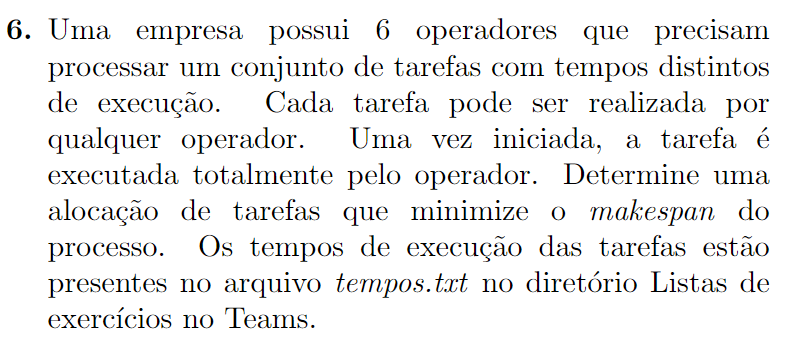

In [ ]:
# Instalando a biblioteca PyMathProg
!pip install pymprog

In [ ]:
from pymprog import*

# tempos de realização das tarefas
T = [54, 83, 15, 71, 77, 36, 53, 38, 27, 87, 76, 91, 14, 29, 12, 77, 32, 87, 
     68, 94, 79, 3, 11, 99, 56, 70, 99, 60, 5, 56, 3, 61, 73, 75, 47, 14, 21,
     86, 5, 77, 16, 89] 

o = [1, 2, 3, 4, 5, 6]

# Quantidade de operadores
n = len(o)

# Quantidade de tarefas 
m = len(T)


begin(" makespan")

#Variáveis de decisão
#faz a criação do produto cartesiano e seus indices
A = iprod(range(n), range(m)) 

# cria uma variável para cada elemento de A
x = var("x", A, bool)

#variavel que faz a soma do makespan
z = var("z")

# Função objetivo: minimizar o valor do makespan
minimize(z)

# Restrições
for j in range(m):
  sum(x[i,j] for i in range(n)) == 1

for i in range(n):
  sum(T[j] * x[i,j] for j in range(m)) <= z

# Resolvendo
solve()

print("\n")

# Valor ótimo
print(f"Valor ótimo = {vobj()}")

print("\n")

# Solução ótima
for i,j in A:
  print(f"x[{i+1}][{j+1}] = {x[i,j].primal}")

print("\n") 
end()



Valor ótimo = 371.0


x[1][1] = 1.0
x[1][2] = 0.0
x[1][3] = 0.0
x[1][4] = 0.0
x[1][5] = 1.0
x[1][6] = 0.0
x[1][7] = 1.0
x[1][8] = 0.0
x[1][9] = 0.0
x[1][10] = 1.0
x[1][11] = 0.0
x[1][12] = 0.0
x[1][13] = 0.0
x[1][14] = 0.0
x[1][15] = 0.0
x[1][16] = 0.0
x[1][17] = 1.0
x[1][18] = 0.0
x[1][19] = 1.0
x[1][20] = 0.0
x[1][21] = 0.0
x[1][22] = 0.0
x[1][23] = 0.0
x[1][24] = 0.0
x[1][25] = 0.0
x[1][26] = 0.0
x[1][27] = 0.0
x[1][28] = 0.0
x[1][29] = 0.0
x[1][30] = 0.0
x[1][31] = 0.0
x[1][32] = 0.0
x[1][33] = 0.0
x[1][34] = 0.0
x[1][35] = 0.0
x[1][36] = 0.0
x[1][37] = 0.0
x[1][38] = 0.0
x[1][39] = 0.0
x[1][40] = 0.0
x[1][41] = 0.0
x[1][42] = 0.0
x[2][1] = 0.0
x[2][2] = 0.0
x[2][3] = 0.0
x[2][4] = 0.0
x[2][5] = 0.0
x[2][6] = 0.0
x[2][7] = 0.0
x[2][8] = 0.0
x[2][9] = 0.0
x[2][10] = 0.0
x[2][11] = 1.0
x[2][12] = 1.0
x[2][13] = 0.0
x[2][14] = 0.0
x[2][15] = 0.0
x[2][16] = 0.0
x[2][17] = 0.0
x[2][18] = 0.0
x[2][19] = 0.0
x[2][20] = 1.0
x[2][21] = 0.0
x[2][22] = 0.0
x[2][23] = 1.0
x[2][24] = 0.0
x[2]

model(' makespan') is not the default model.